In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
# data loading
data = sns.load_dataset("titanic")
print("shape:", data.shape)
data.head()

shape: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 1. Preview of Data

In [8]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [51]:
data['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

## 2. Data settle

### 2.1 Select Features

In [76]:
graph = data.loc[:,['pclass','fare','sex','who','survived']] 


In [77]:
graph['sex'].replace({'male':0, 'female':1}, inplace=True)
graph['who'].replace({'man':0, 'woman':1, 'child':2}, inplace=True)
Xdf = graph.loc[:,['pclass','fare','sex','who']]
ydf = graph.loc[:,['survived']]
type(Xdf)

pandas.core.frame.DataFrame

## 3. Data Visualization

/Users/joonholee/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/joonholee/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


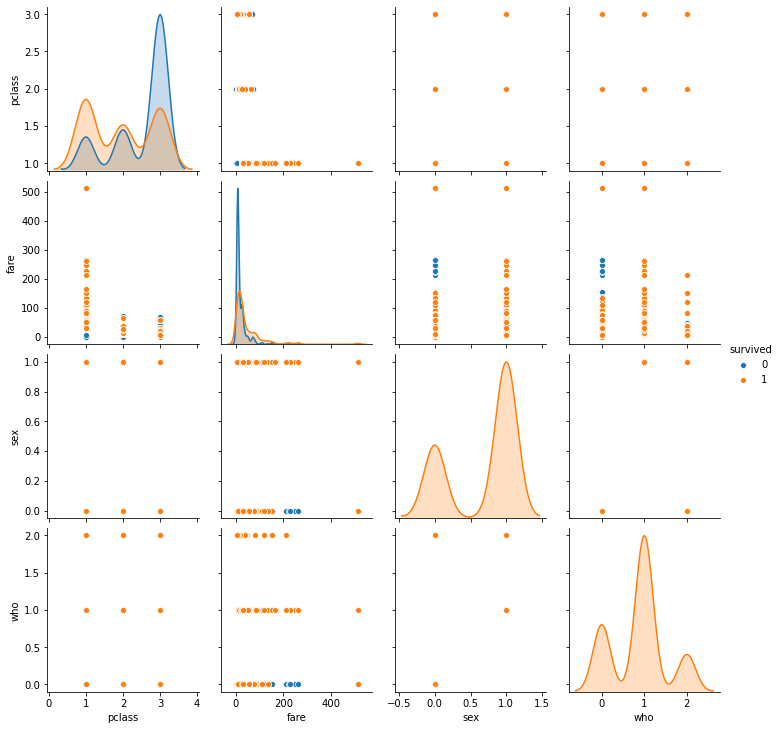

In [41]:
g = sns.pairplot(graph, hue='survived')
plt.show()

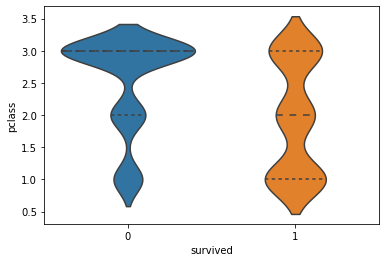

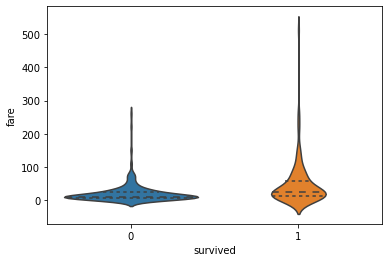

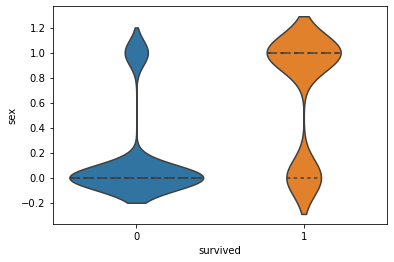

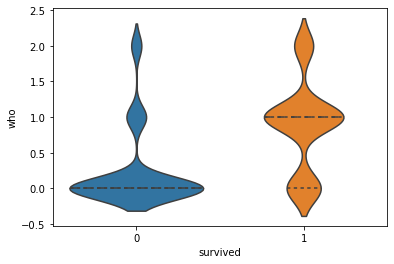

In [61]:
g = sns.violinplot(x='survived', y='pclass', data=graph, inner='quartile')
plt.show()
g = sns.violinplot(x='survived', y='fare', data=graph, inner='quartile')
plt.show()
g = sns.violinplot(x='survived', y='sex', data=graph, inner='quartile')
plt.show()
g = sns.violinplot(x='survived', y='who', data=graph, inner='quartile')
plt.show()

## 4. Modeling

In [68]:
X=Xdf.values
y=ydf.values
type(X)

numpy.ndarray

In [69]:
# split data set(X_train, X_test, y_train, y_test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

### 4.1 KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

<ipython-input-70-5d15626ddc50>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

### 4.2 Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

/Users/joonholee/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

### 4.3 Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

### 4.4 Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

<ipython-input-73-2ae5f042fe42>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier()

## 5 scoring

In [74]:
print("1. KNN Scoring")
print("\ttrain accuracy:", neigh.score(X_train,y_train))
print("\ttest accuracy:", neigh.score(X_test,y_test))
print("2. Logistic Regression Scoring")
print("\ttrain accuracy:", lr.score(X_train,y_train))
print("\ttest accuracy:", lr.score(X_test,y_test))
print("3. Decision Tree Scoring")
print("\ttrain accuracy:", dt.score(X_train,y_train))
print("\ttest accuracy:", dt.score(X_test,y_test))
print("4. Random Forest Scoring")
print("\ttrain accuracy:", rf.score(X_train,y_train))
print("\ttest accuracy:", rf.score(X_test,y_test))

1. KNN Scoring
	train accuracy: 0.8458083832335329
	test accuracy: 0.8026905829596412
2. Logistic Regression Scoring
	train accuracy: 0.781437125748503
	test accuracy: 0.8565022421524664
3. Decision Tree Scoring
	train accuracy: 0.9191616766467066
	test accuracy: 0.8295964125560538
4. Random Forest Scoring
	train accuracy: 0.9191616766467066
	test accuracy: 0.8430493273542601
